<a href="https://colab.research.google.com/github/Huwalli/PLta/blob/main/%E8%B3%87%E6%96%99%E8%A6%96%E8%A6%BA%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

每日飲食指南手冊
https://www.hpa.gov.tw/Pages/EBook.aspx?nodeid=1208

# 訓練

In [ ]:
import pandas as pd

# 建立一份甜點清單
desserts = pd.Series([
    "蛋糕", "布丁", "蛋糕", "冰淇淋", "餅乾", "蛋糕", "冰淇淋"
])

print("🍰 甜點資料：")
print(desserts)
print("\n🔹 使用 value_counts() 統計結果：")
dessert_count = desserts.value_counts()
dessert_count


🍰 甜點資料：
0     蛋糕
1     布丁
2     蛋糕
3    冰淇淋
4     餅乾
5     蛋糕
6    冰淇淋
dtype: object

🔹 使用 value_counts() 統計結果：


,count
蛋糕,3
冰淇淋,2
布丁,1
餅乾,1


In [ ]:
print("\n🔹 加上 reset_index() 後的結果：")
dessert_count = desserts.value_counts().reset_index()
dessert_count


🔹 加上 reset_index() 後的結果：


,index,count
0,蛋糕,3
1,冰淇淋,2
2,布丁,1
3,餅乾,1


In [ ]:
dessert_count.columns = ['Food Item', 'Count']
dessert_count

,Food Item,Count
0,蛋糕,3
1,冰淇淋,2
2,布丁,1
3,餅乾,1


In [ ]:
# 排序
dessert_count = dessert_count.sort_values(by='Count', ascending=False)

print("\n🔸 依照 Count 由大到小排序後：")
dessert_count


🔸 依照 Count 由大到小排序後：


,Food Item,Count
0,蛋糕,3
1,冰淇淋,2
2,布丁,1
3,餅乾,1


In [ ]:
desserts = ['蛋糕', '布丁', '蛋糕', '冰淇淋', '蛋糕', '布丁']
pd.value_counts(desserts)

/tmp/ipython-input-2197410847.py:2: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.

/tmp/ipython-input-2197410847.py:2: FutureWarning:

value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



,count
蛋糕,3
布丁,2
冰淇淋,1


##解題


In [ ]:
import pandas as pd
desserts = pd.Series(["蛋糕", "布丁", "蛋糕", "冰淇淋", "餅乾", "蛋糕", "冰淇淋"])
dessert_count = desserts.value_counts()
dessert_count_reset = dessert_count.reset_index()

dessert_count_reset

,index,count
0,蛋糕,3
1,冰淇淋,2
2,布丁,1
3,餅乾,1


In [ ]:
# 高到低排序
import pandas as pd
food_count = pd.DataFrame({
    "Food Item": ["蛋糕","布丁","餅乾","冰淇淋"],
    "Count": [3,2,1,2]
})
food_count_sorted = food_count.sort_values(by="Count", ascending=True)
food_count_sorted

,Food Item,Count
2,餅乾,1
1,布丁,2
3,冰淇淋,2
0,蛋糕,3


In [ ]:
import pandas as pd

# 建立一份甜點清單
desserts = pd.Series([
    "蛋糕", "布丁", "蛋糕", "冰淇淋", "餅乾", "蛋糕", "冰淇淋"
])

print("🍰 甜點資料：")
print(desserts)
print("\n🔹 使用 value_counts() 統計結果：")
dessert_count = desserts.value_counts()
dessert_count

import plotly.express as px

# 將 value_counts() 的結果轉成 DataFrame，方便畫圖
dessert_df = dessert_count.reset_index()
dessert_df.columns = ['Dessert', 'Count']

# 畫圓餅圖
fig = px.pie(
    dessert_df,
    names='Dessert',
    values='Count',
    title='甜點喜好圓餅圖',
    hole=0.4
)

fig.show()


🍰 甜點資料：
0     蛋糕
1     布丁
2     蛋糕
3    冰淇淋
4     餅乾
5     蛋糕
6    冰淇淋
dtype: object

🔹 使用 value_counts() 統計結果：


## groupby

In [ ]:
# 假設有分數欄位
import pandas as pd
df = pd.DataFrame({
    "班級": ["A","A","B","B"],
    "學生": ["小明","小華","小強","小美"],
    "分數": [80, 90, 70, 85],
    "身高": [160, 153, 170, 150],
})



In [ ]:
gbdf=df.groupby("班級")["分數"].mean()
gbdf

,分數
班級,
A,85.0
B,77.5


In [ ]:
gbdf=df.groupby("班級")[["分數","身高"]].mean()
gbdf

,分數,身高
班級,,
A,85.0,156.5
B,77.5,160.0


In [ ]:
df.groupby("班級")[["分數","身高"]].agg(['sum','mean','max','min','std','size'])

分數                                 身高                                 
    sum  mean max min        std size  sum   mean  max  min        std size
班級                                                                         
A   170  85.0  90  80   7.071068    2  313  156.5  160  153   4.949747    2
B   155  77.5  85  70  10.606602    2  320  160.0  170  150  14.142136    2

## 文字雲


In [1]:
import pandas as pd

# 假資料
data = {
    '餐別': ['早餐', '早餐', '早餐', '午餐', '早餐'],
    '五穀雜糧': ['吐司', '飯糰', '吐司', '白飯', '饅頭'],
    '蛋白質': ['蛋', '雞胸肉', '豆漿', '豬排', '蛋'],
    '乳製品': ['牛奶', '優格', None, '牛奶', '起司'],
    '水果': ['蘋果', '香蕉', '香蕉', '葡萄', '蘋果']
}

df = pd.DataFrame(data)
df


,餐別,五穀雜糧,蛋白質,乳製品,水果
0,早餐,吐司,蛋,牛奶,蘋果
1,早餐,飯糰,雞胸肉,優格,香蕉
2,早餐,吐司,豆漿,None,香蕉
3,午餐,白飯,豬排,牛奶,葡萄
4,早餐,饅頭,蛋,起司,蘋果


In [2]:
# 只取早餐
Day = df[df['餐別'] == '早餐']

# 抽出四種食物（忽略 NaN）
food_items = pd.concat([
    Day['五穀雜糧'],
    Day['蛋白質'],
    Day['乳製品'],
    Day['水果']
]).dropna()

food_count = food_items.value_counts().reset_index()
food_count.columns = ['Food Item', 'Count']
food_count


,Food Item,Count
0,吐司,2
1,香蕉,2
2,蛋,2
3,蘋果,2
4,飯糰,1
5,饅頭,1
6,雞胸肉,1
7,牛奶,1
8,豆漿,1
9,起司,1


In [3]:
# 下載完整 Noto Sans TC 字體集
!wget -O NotoSansTC.zip https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip

# 解壓縮
!unzip -o NotoSansTC.zip

# 找出 Regular 字體檔
!ls NotoSansCJKtc* | grep Regular


--2025-12-05 02:33:28--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 172.217.203.207, 173.194.216.207, 142.250.98.207, ...
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|172.217.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansTC.zip’

NotoSansTC.zip      100%[===================>] 115.63M   112MB/s    in 1.0s    

2025-12-05 02:33:29 (112 MB/s) - ‘NotoSansTC.zip’ saved [121247366/121247366]

Archive:  NotoSansTC.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKtc-Black.otf  
  inflating: NotoSansCJKtc-Bold.otf  
  inflating: NotoSansCJKtc-DemiLight.otf  
  inflating: NotoSansCJKtc-Light.otf  
  inflating: NotoSansCJKtc-Medium.otf  
  inflating: NotoSansCJKtc-Regular.otf  
  inflating: NotoSansCJKtc-Thin.otf  
  infla

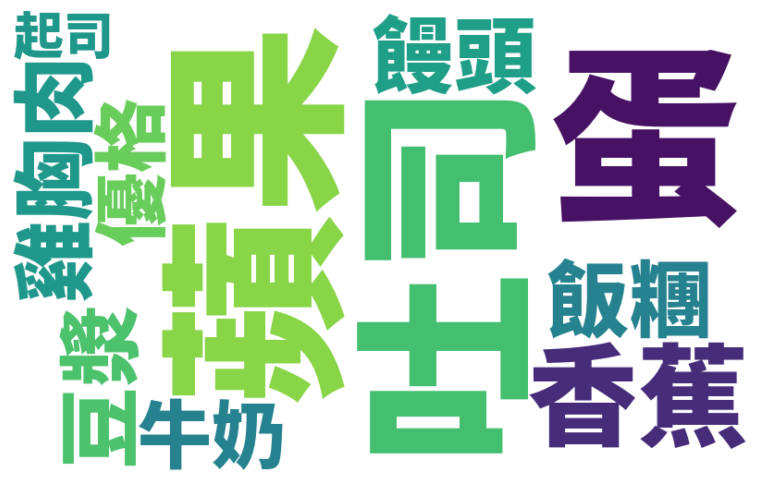

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 把全部食物接成一段字串
text = " ".join(food_items.astype(str))

wc = WordCloud(
    font_path="/content/NotoSansCJKtc-Black.otf",  # 中文字體
    background_color="white",
    width=800,
    height=500
).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [8]:
words = ["apple", "banana", "cat"]
joined = " ".join(words)
joined

'apple banana cat'

In [10]:
import pandas as pd
food_items = pd.Series(["壽司", None, "牛肉麵", "滷肉飯", None, "炒飯"])
food_items

,0
0,壽司
1,None
2,牛肉麵
3,滷肉飯
4,None
5,炒飯


In [11]:
food_items.dropna()

,0
0,壽司
2,牛肉麵
3,滷肉飯
5,炒飯


### 特定形狀的文字雲

In [19]:
#找一張特殊形狀的黑白圖片
from google.colab import files
uploaded = files.upload()



Saving food.jpg to food.jpg


In [22]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 讀取圖片 (請換成你的圖片檔名)
mask = np.array(Image.open("food.jpg"))


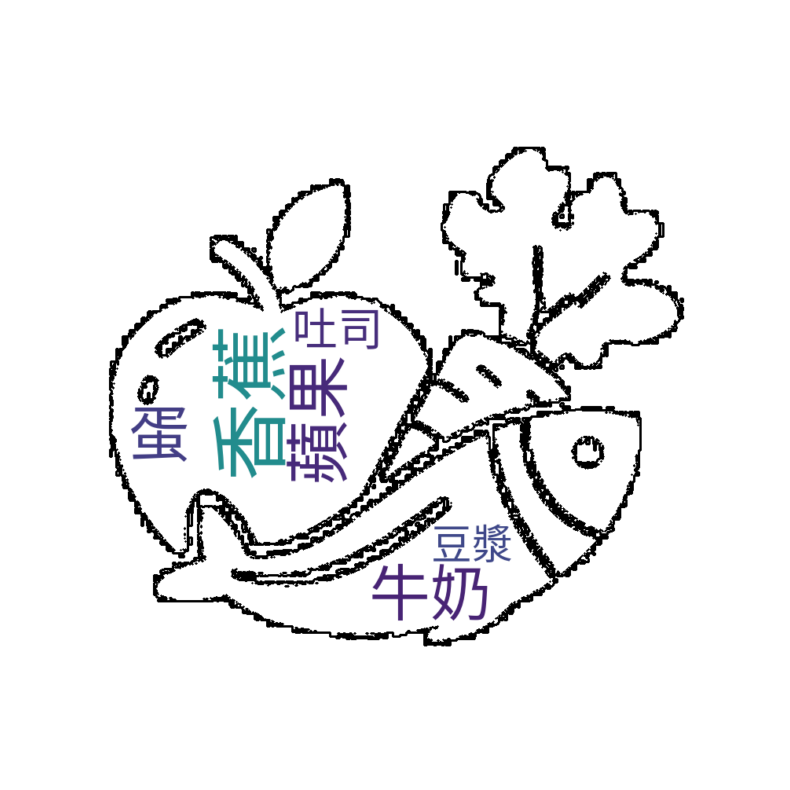

In [25]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 讀取 mask 圖片（記得把檔名換成你的）
mask = np.array(Image.open("food.jpg"))

# 假資料：你可以換成自己的 text 或 freq_dict
text = "香蕉 蘋果 牛奶 蛋 吐司 豆漿 蘋果 香蕉 香蕉 蛋 牛奶"

wc = WordCloud(
    font_path="NotoSansCJKtc-Regular.otf",   # 你的中文字體
    background_color="white",
    mask=mask,                                # 使用蒙版
    width=1000,
    height=1000,
    contour_width=2,                          # 可選：描邊更清楚
    contour_color="black"
).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


## 作業解答

In [ ]:
import pandas as pd
import plotly.express as px

# 三天的點心紀錄
data = {
    "天數": ["星期一", "星期二", "星期三"],
    "餅乾": [4, 2, 3],
    "果凍": [2, 5, 1],
    "巧克力": [3, 1, 4]
}

df = pd.DataFrame(data)

# 轉成長格式（Plotly 畫堆疊圖必備）
df_melt = df.melt(id_vars="天數",
                  value_vars=["餅乾", "果凍", "巧克力"],
                  var_name="點心種類",
                  value_name="數量")

# 畫堆疊柱狀圖
fig = px.bar(
    df_melt,
    x="天數",
    y="數量",
    color="點心種類",
    title="三天點心統計：堆疊柱狀圖",
    barmode="stack"   # 這行重要：堆疊！
)
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# 建立簡單的水果喜好資料
df = pd.DataFrame({
    "班級": ["A", "B", "C"],
    "蘋果": [3, 2, 4],
    "香蕉": [2, 3, 1],
    "橘子": [1, 2, 2]
})

print("原始資料：")
print(df)


原始資料：
  班級  蘋果  香蕉  橘子
0  A   3   2   1
1  B   2   3   2
2  C   4   1   2


In [ ]:
stacked_df = pd.melt(
    df,
    id_vars=["班級"],          # 保留班級欄位
    value_vars=["蘋果","香蕉","橘子"], # 要轉換的欄位
    var_name="水果",           # 新欄位名稱
    value_name="數量"          # 新欄位名稱
)

print("Melt 後資料：")
print(stacked_df)


Melt 後資料：
  班級  水果  數量
0  A  蘋果   3
1  B  蘋果   2
2  C  蘋果   4
3  A  香蕉   2
4  B  香蕉   3
5  C  香蕉   1
6  A  橘子   1
7  B  橘子   2
8  C  橘子   2


In [ ]:
fruit_total = stacked_df.groupby("水果")["數量"].sum().reset_index()
print("每種水果總數：")
print(fruit_total)


每種水果總數：
   水果  數量
0  橘子   5
1  蘋果   9
2  香蕉   6


In [ ]:
fig = px.bar(
    stacked_df,
    x="班級",
    y="數量",
    color="水果",
    title="班級水果喜好堆疊柱狀圖"
)
fig.show()


# 實操

###上傳csv

將剛才下載的csv檔上傳至colab

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving 食物 - 工作表1 .csv to 食物 - 工作表1 .csv


路徑：/content/你的csv檔名稱.csv

In [ ]:
import pandas as pd



# Read the CSV file
df = pd.read_csv('/content/食物 - 工作表1 .csv')

# Display the first few rows of the DataFrame
df

,日期,餐別,五穀雜糧,蛋白質,乳製品,蔬菜,水果,油脂,熱量
0,1,早餐,麵,蝦,起司,NaN,西瓜,NaN,485
1,1,午餐,麵,蛋,NaN,花椰菜,木瓜,杏仁,500
2,1,晚餐,玉米,豆類,NaN,花椰菜,香蕉,核桃,490
3,1,每日總熱量,NaN,NaN,NaN,NaN,NaN,NaN,1475
4,2,早餐,麥片,蛋,起司,NaN,蘋果,NaN,405
...,...,...,...,...,...,...,...,...,...
115,29,每日總熱量,NaN,NaN,NaN,NaN,NaN,NaN,1555
116,30,早餐,全麥麵包,蝦,牛奶,NaN,蘋果,NaN,425
117,30,午餐,麵,蛋,NaN,小黃瓜,香蕉,芝麻油,535
118,30,晚餐,地瓜,雞胸肉,NaN,羽衣甘藍,西瓜,芝麻油,500


###長條圖
整理表格並提取需要資料以創長條圖

In [ ]:
#提取每天早餐的菜單
Day = df[df['餐別'] == '早餐']

In [ ]:
Day

,日期,餐別,五穀雜糧,蛋白質,乳製品,蔬菜,水果,油脂,熱量
0,1,早餐,麵,蝦,起司,NaN,西瓜,NaN,485
4,2,早餐,麥片,蛋,起司,NaN,蘋果,NaN,405
8,3,早餐,麥片,魚,牛奶,NaN,西瓜,NaN,495
12,4,早餐,地瓜,豆類,優格,NaN,橘子,NaN,432
16,5,早餐,全麥麵包,雞胸肉,優格,NaN,西瓜,NaN,520
20,6,早餐,玉米,魚,起司,NaN,奇異果,NaN,372
24,7,早餐,全麥麵包,豆類,優格,NaN,香蕉,NaN,505
28,8,早餐,全麥麵包,蝦,牛奶,NaN,西瓜,NaN,415
32,9,早餐,全麥麵包,魚,優格,NaN,奇異果,NaN,452
36,10,早餐,米,蛋,起司,NaN,木瓜,NaN,415


In [ ]:
#因為當初隨機生成的早餐菜單沒有水果油脂，所以提取 五穀雜糧, 蛋白質, 乳製品, 水果就好
food_items = pd.concat([Day['五穀雜糧'], Day['蛋白質'], Day['乳製品'], Day['水果']])
food_items

,0
0,麵
4,麥片
8,麥片
12,地瓜
16,全麥麵包
...,...
100,奇異果
104,西瓜
108,橘子
112,木瓜


In [ ]:
# 計算每種食物的出現次數
food_count = food_items.value_counts().reset_index()

# 重新命名欄位以提高可讀性
food_count.columns = ['Food Item', 'Count']

# 按照出現次數由大到小排序
food_count = food_count.sort_values(by='Count', ascending=False)
food_count


,Food Item,Count
0,優格,13
1,起司,12
2,全麥麵包,10
3,蘋果,8
4,魚,8
5,西瓜,7
6,麥片,6
7,木瓜,6
8,豆類,6
9,牛奶,5


In [ ]:
import plotly as plt
import plotly.express as px
import plotly.graph_objects as go
# Create a bar chart based on the sorted food item frequency
fig = px.bar(food_count, x='Food Item', y='Count', title="食物出現頻率 (Sorted by Count)", labels={
    "Food Item": "食物品項",
    "Count": "頻率"
})

# Display the plot
fig.show()

In [ ]:
import plotly.express as px

# 使用 food_count DataFrame 畫圓餅圖
fig = px.pie(
    food_count,
    names='Food Item',     # 圓餅圖的分類
    values='Count',        # 每一片的數值
    title='各類食物出現次數圓餅圖',  # 圖表標題
    hole=0.4               # 改成 0.4 可以變甜甜圈圖
)

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# 假設 Day 是早餐資料
Day = df[df['餐別'] == '早餐']
Day


,日期,餐別,五穀雜糧,蛋白質,乳製品,蔬菜,水果,油脂,熱量
0,1,早餐,麵,蝦,起司,NaN,西瓜,NaN,485
4,2,早餐,麥片,蛋,起司,NaN,蘋果,NaN,405
8,3,早餐,麥片,魚,牛奶,NaN,西瓜,NaN,495
12,4,早餐,地瓜,豆類,優格,NaN,橘子,NaN,432
16,5,早餐,全麥麵包,雞胸肉,優格,NaN,西瓜,NaN,520
20,6,早餐,玉米,魚,起司,NaN,奇異果,NaN,372
24,7,早餐,全麥麵包,豆類,優格,NaN,香蕉,NaN,505
28,8,早餐,全麥麵包,蝦,牛奶,NaN,西瓜,NaN,415
32,9,早餐,全麥麵包,魚,優格,NaN,奇異果,NaN,452
36,10,早餐,米,蛋,起司,NaN,木瓜,NaN,415


In [ ]:
# 建立長格式 DataFrame，方便堆疊
stacked_df = pd.melt(
    Day,
    value_vars=['五穀雜糧','蛋白質','乳製品','水果'],
    var_name='類別',
    value_name='食物'
)
stacked_df




,類別,食物
0,五穀雜糧,麵
1,五穀雜糧,麥片
2,五穀雜糧,麥片
3,五穀雜糧,地瓜
4,五穀雜糧,全麥麵包
...,...,...
115,水果,奇異果
116,水果,西瓜
117,水果,橘子
118,水果,木瓜


In [ ]:
# 計算每種食物在每個類別的次數
food_count_stacked = stacked_df.groupby(['類別','食物']).size().reset_index(name='次數')
food_count_stacked

,類別,食物,次數
0,乳製品,優格,13
1,乳製品,牛奶,5
2,乳製品,起司,12
3,五穀雜糧,全麥麵包,10
4,五穀雜糧,地瓜,3
5,五穀雜糧,玉米,4
6,五穀雜糧,米,3
7,五穀雜糧,麥片,6
8,五穀雜糧,麵,4
9,水果,奇異果,3


In [ ]:
# 畫堆疊柱狀圖
fig = px.bar(
    food_count_stacked,
    x='類別',
    y='次數',
    color='食物',
    title='早餐食物類別堆疊柱狀圖'
)

fig.show()

###折線圖
這次來試試看折線圖

In [ ]:
AllDay = df[df['餐別'] == '每日總熱量']


In [ ]:
AllDay

,日期,餐別,五穀雜糧,蛋白質,乳製品,蔬菜,水果,油脂,熱量
3,1,每日總熱量,NaN,NaN,NaN,NaN,NaN,NaN,1475
7,2,每日總熱量,NaN,NaN,NaN,NaN,NaN,NaN,1475
11,3,每日總熱量,NaN,NaN,NaN,NaN,NaN,NaN,1400
15,4,每日總熱量,NaN,NaN,NaN,NaN,NaN,NaN,1426
19,5,每日總熱量,NaN,NaN,NaN,NaN,NaN,NaN,1282
23,6,每日總熱量,NaN,NaN,NaN,NaN,NaN,NaN,1207
27,7,每日總熱量,NaN,NaN,NaN,NaN,NaN,NaN,1602
31,8,每日總熱量,NaN,NaN,NaN,NaN,NaN,NaN,1440
35,9,每日總熱量,NaN,NaN,NaN,NaN,NaN,NaN,1199
39,10,每日總熱量,NaN,NaN,NaN,NaN,NaN,NaN,1410


In [ ]:
#之前有提過的折線圖
import plotly as plt
import plotly.express as px
import plotly.graph_objects as go

# 建立 Plotly 折線圖以顯示每日總熱量攝取
fig = px.line(AllDay, x="日期", y="熱量", title="每日熱量攝取", labels={
    "日期": "本月日期",
    "熱量": "卡路里"
})

# 顯示圖表
fig.show()

###嘗試看看替換資料

In [ ]:
import pandas as pd

# Path to your CSV file
file_path = '/content/a05007501-2138375930.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df

,統計期,年齡別,總計[人],博士/計[人],博士/畢業[人],博士/肄業[人],碩士/計[人],碩士/畢業[人],碩士/肄業[人],大學/計[人],...,國中/畢業[人],國中/肄業[人],初職/計[人],初職/畢業[人],初職/肄業[人],國小/計[人],國小/畢業[人],國小/肄業[人],自修[人],不識字[人]
0,98年,總計,2213768,6221,3486,2735,187551,155572,31979,634489,...,167773,35610,4677,3945,732,223171,201472,21699,7105,20147
1,98年,15~19歲,159994,0,0,0,0,0,0,28991,...,19728,11711,0,0,0,1404,505,899,0,10
2,98年,20~24歲,154170,68,0,68,6913,1156,5757,97466,...,3146,1902,0,0,0,596,75,521,4,8
3,98年,25~29歲,189652,908,110,798,26874,18646,8228,92953,...,4223,924,0,0,0,820,341,479,12,61
4,98年,30~34歲,200555,1289,686,603,29744,23780,5964,76551,...,6386,1364,0,0,0,1605,692,913,32,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,113年,45~49歲,202528,5663,4209,1454,41529,36540,4989,75866,...,5656,817,0,0,0,1193,785,408,21,67
188,113年,50~54歲,181537,4871,3545,1326,34438,30992,3446,53917,...,7699,1128,0,0,0,1476,934,542,37,87
189,113年,55~59歲,183780,4866,3851,1015,28294,25995,2299,45527,...,11652,1438,0,0,0,2491,1790,701,46,125
190,113年,60~64歲,187376,4421,3814,607,20384,19006,1378,44559,...,18219,1823,60,51,9,5677,4924,753,61,136


如果看到這邊還是沒想法，我們甚至可以要求chatgpt幫我們想研究主題，自己做延伸。

In [ ]:
#這是按照gpt指示寫的研究，但是錯誤示範(沒有篩選??別欄位)
df_high_ed = df[['統計期', '博士/計[人]', '碩士/計[人]']]
df_melted_high_ed = df_high_ed.melt(id_vars=['統計期'], var_name='學歷', value_name='人數')

fig = px.line(df_melted_high_ed, x="統計期", y="人數", color='學歷', title="博士與碩士人數趨勢")
fig.show()

In [ ]:
#正確示範
import pandas as pd
import plotly.express as px

# 只篩選「年齡別」為「總計」的資料
df_total = df[df['年齡別'] == '總計']
# 只保留統計期、博士與碩士數據
df_high_ed = df_total[['統計期', '博士/計[人]', '碩士/計[人]']]

# 轉換為長格式資料
df_melted_high_ed = df_high_ed.melt(id_vars=['統計期'], var_name='學歷', value_name='人數')

# 繪製折線圖
fig = px.line(df_melted_high_ed, x="統計期", y="人數", color='學歷', title="博士與碩士人數趨勢（總計）")
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# 選擇需要的資料
df_high_ed = df[['統計期', '年齡別', '博士/計[人]', '碩士/計[人]']]

# 轉換為長格式
df_melted_high_ed = df_high_ed.melt(id_vars=['統計期', '年齡別'], var_name='學歷', value_name='人數')

# 繪製直方圖
fig = px.histogram(df_melted_high_ed,
                   x="年齡別",
                   y="人數",
                   color="學歷",  # 顏色區分博士與碩士
                   title="博士與碩士年齡分佈直方圖",
                   labels={"年齡別": "年齡層", "人數": "人數"})

fig.show()


# kaggle資料集玩玩看


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving mal_anime.csv to mal_anime.csv


In [ ]:
import pandas as pd



# Read the CSV file
df = pd.read_csv('/content/mal_anime.csv')

# Display the first few rows of the DataFrame
df

,myanimelist_id,title,description,image,Type,Episodes,Status,Premiered,Released_Season,Released_Year,...,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,characters,source_url
0,1,Cowboy Bebop,"Crime is timeless. By the year 2071, humanity ...",https://cdn.myanimelist.net/images/anime/4/196...,TV,26,Finished Airing,Spring 1998,Spring,1998.0,...,NaN,24 min. per ep.,R - 17+ (violence & profanity),8.75,#48,#42,"2,008,019","87,916","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...",https://cdn.myanimelist.net/images/anime/1439/...,Movie,1.0,Finished Airing,NaN,NaN,NaN,...,NaN,1 hr. 55 min.,R - 17+ (violence & profanity),8.38,#232,#649,"403,604","1,748","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...",https://cdn.myanimelist.net/images/anime/1130/...,TV,26,Finished Airing,Spring 1998,Spring,1998.0,...,Shounen,24 min. per ep.,PG-13 - Teens 13 or older,8.22,#385,#265,"815,140","17,193","[{""id"": 713, ""name"": ""Stryfe, Meryl"", ""url"": ""...",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"Though hidden away from the general public, Wi...",https://cdn.myanimelist.net/images/anime/10/19...,TV,26.0,Finished Airing,Summer 2002,Summer,2002.0,...,NaN,25 min. per ep.,PG-13 - Teens 13 or older,7.23,#3344,#1979,"125,868",686,"[{""id"": 300, ""name"": ""Amon"", ""url"": ""https://m...",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,https://cdn.myanimelist.net/images/anime/7/215...,TV,52,Finished Airing,Fall 2004,Fall,2004.0,...,Shounen,23 min. per ep.,PG - Children,6.92,#4887,#5765,"16,456",18,"[{""id"": 9054, ""name"": ""Beet"", ""url"": ""https://...",https://myanimelist.net/anime/8/Bouken_Ou_Beet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19926,62876,Saijo no Osewa: Takane no Hanadarake na Meimon...,"A high school boy, Itsuki Tomonari, gets invol...",https://cdn.myanimelist.net/images/anime/1962/...,Unknown,Unknown,Not yet aired,NaN,NaN,NaN,...,NaN,Unknown,NaN,NaN,NaN,#15824,764,1,NaN,https://myanimelist.net/anime/62876/Saijo_no_O...
19927,62882,Mahou Shoujo holoWitch! The Stage: Trick or Ma...,No synopsis information has been added to this...,https://cdn.myanimelist.net/images/anime/1586/...,ONA,1,Finished Airing,NaN,NaN,NaN,...,NaN,49 min.,G - All Ages,NaN,#18356,#27568,87,0,"[{""id"": 188767, ""name"": ""Amane, Kanata"", ""url""...",https://myanimelist.net/anime/62882/Mahou_Shou...
19928,62883,Bungou Stray Dogs Wan! 2,Second season ofBungou Stray Dogs Wan!.,https://cdn.myanimelist.net/images/anime/1199/...,TV,Unknown,Not yet aired,?,NaN,NaN,...,NaN,Unknown,PG-13 - Teens 13 or older,NaN,NaN,#11015,"2,956",6,"[{""id"": 125056, ""name"": ""Dazai, Osamu"", ""url"":...",https://myanimelist.net/anime/62883/Bungou_Str...
19929,62893,Nigashita Sakana wa Ookikatta ga Tsuriageta Sa...,"Maria, the daughter of a duke, grew up believi...",https://cdn.myanimelist.net/images/anime/1308/...,TV,Unknown,Not yet aired,Spring 2026,Spring,2026.0,...,NaN,Unknown,NaN,NaN,NaN,#17303,557,1,"[{""id"": 282242, ""name"": ""Annovazzi, Maria"", ""u...",https://myanimelist.net/anime/62893/Nigashita_...


In [ ]:
# 先把 Ranked 欄位的 "#" 去掉並轉成數字
df["Ranked"] = df["Ranked"].str.replace("#", "").astype(float)



抓出1-10名

In [ ]:
# 抓出排行榜前 20 名
top10 = df[df["Ranked"] <= 10].sort_values(by="Ranked")

top10


,myanimelist_id,title,description,image,Type,Episodes,Status,Premiered,Released_Season,Released_Year,...,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,characters,source_url
16509,52991,Sousou no Frieren,During their decade-long quest to defeat the D...,https://cdn.myanimelist.net/images/anime/1015/...,TV,28,Finished Airing,Fall 2023,Fall,2023.0,...,Shounen,24 min. per ep.,PG-13 - Teens 13 or older,9.29,1.0,#126,"1,248,505","78,149","[{""id"": 188176, ""name"": ""Fern"", ""url"": ""https:...",https://myanimelist.net/anime/52991/Sousou_no_...
17961,57555,Chainsaw Man Movie: Reze-hen,Sequel toChainsaw Man.,https://cdn.myanimelist.net/images/anime/1763/...,Movie,1,Finished Airing,NaN,NaN,NaN,...,Shounen,1 hr. 41 min.,R - 17+ (violence & profanity),9.21,2.0,#1146,"238,273","5,609","[{""id"": 170732, ""name"": ""Denji"", ""url"": ""https...",https://myanimelist.net/anime/57555/Chainsaw_M...
3890,5114,Fullmetal Alchemist: Brotherhood,After a horrific alchemy experiment goes wrong...,https://cdn.myanimelist.net/images/anime/1208/...,TV,64,Finished Airing,Spring 2009,Spring,2009.0,...,Shounen,24 min. per ep.,R - 17+ (violence & profanity),9.10,3.0,#3,"3,590,985","237,631","[{""id"": 12, ""name"": ""Elric, Alphonse"", ""url"": ...",https://myanimelist.net/anime/5114/Fullmetal_A...
5412,9253,Steins;Gate,Eccentric scientist Rintarou Okabe has a never...,https://cdn.myanimelist.net/images/anime/1935/...,TV,24,Finished Airing,Spring 2011,Spring,2011.0,...,NaN,24 min. per ep.,PG-13 - Teens 13 or older,9.07,4.0,#14,"2,747,194","198,807","[{""id"": 35258, ""name"": ""Hashida, Itaru"", ""url""...",https://myanimelist.net/anime/9253/Steins_Gate
12476,38524,Shingeki no Kyojin Season 3 Part 2,Seeking to restore humanity's diminishing hope...,https://cdn.myanimelist.net/images/anime/1517/...,TV,10,Finished Airing,Spring 2019,Spring,2019.0,...,Shounen,23 min. per ep.,R - 17+ (violence & profanity),9.05,5.0,#21,"2,510,435","62,015","[{""id"": 40881, ""name"": ""Ackerman, Mikasa"", ""ur...",https://myanimelist.net/anime/38524/Shingeki_n...
12857,39486,Gintama: The Final,Two years have passed following the Tendoshuu'...,https://cdn.myanimelist.net/images/anime/1245/...,Movie,1,Finished Airing,NaN,NaN,NaN,...,Shounen,1 hr. 44 min.,PG-13 - Teens 13 or older,9.05,6.0,#1512,"176,153","4,573","[{""id"": 674, ""name"": ""Kagura"", ""url"": ""https:/...",https://myanimelist.net/anime/39486/Gintama__T...
9000,28977,Gintama°,"Gintoki, Shinpachi, and Kagura return as the f...",https://cdn.myanimelist.net/images/anime/3/720...,TV,51,Finished Airing,Spring 2015,Spring,2015.0,...,Shounen,24 min. per ep.,PG-13 - Teens 13 or older,9.05,7.0,#346,"678,336","17,326","[{""id"": 674, ""name"": ""Kagura"", ""url"": ""https:/...",https://myanimelist.net/anime/28977/Gintama°
6132,11061,Hunter x Hunter (2011),Hunters devote themselves to accomplishing haz...,https://cdn.myanimelist.net/images/anime/1337/...,TV,148,Finished Airing,Fall 2011,Fall,2011.0,...,Shounen,23 min. per ep.,PG-13 - Teens 13 or older,9.03,8.0,#8,"3,095,849","224,771","[{""id"": 30, ""name"": ""Freecss, Gon"", ""url"": ""ht...",https://myanimelist.net/anime/11061/Hunter_x_H...
18806,60022,One Piece Fan Letter,Although the golden age of piracy is about to ...,https://cdn.myanimelist.net/images/anime/1455/...,TV Special,1,Finished Airing,NaN,NaN,NaN,...,Shounen,24 min.,PG-13 - Teens 13 or older,9.03,9.0,#1911,"131,988","2,386","[{""id"": 257441, ""name"": ""Girl"", ""url"": ""https:...",https://myanimelist.net/anime/60022/One_Piece_...
739,820,Ginga Eiyuu Densetsu,The 150-year-long stalemate between the two in...,https://cdn.myanimelist.net/images/anime/1976/...,OVA,110,Finished Airing,NaN,NaN,NaN,...,NaN,26 min. per ep.,R - 17+ (violence & profanity),9.02,10.0,#752,"352,351","17,405","[{""id"": 3869, ""name"": ""Attenborough, Dusty"", ""...",https://myanimelist.net/anime/820/Ginga_Eiyuu_...


In [ ]:
descriptions = top10["description"].tolist()
descriptions

['During their decade-long quest to defeat the Demon King, the members of the hero\'s party—Himmel himself, the priest Heiter, the dwarf warrior Eisen, and the elven mage Frieren—forge bonds through adventures and battles, creating unforgettable precious memories for most of them.However, the time that Frieren spends with her comrades is equivalent to merely a fraction of her life, which has lasted over a thousand years. When the party disbands after their victory, Frieren casually returns to her "usual" routine of collecting spells across the continent. Due to her different sense of time, she seemingly holds no strong feelings toward the experiences she went through.As the years pass, Frieren gradually realizes how her days in the hero\'s party truly impacted her. Witnessing the deaths of two of her former companions, Frieren begins to regret having taken their presence for granted; she vows to better understand humans and create real personal connections. Although the story of that o

In [ ]:
!pip install -U -q google-generativeai # Install the Python SDK
import google.generativeai as genai
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

KeyboardInterrupt: 

In [ ]:
# 建立 Gemini-Pro 模型
model = genai.GenerativeModel('gemini-1.5-flash')

In [ ]:
print("🎮 歡迎使用《個性化動畫推薦系統》！\n請回答以下問題，我會根據你的個性推薦動畫～\n")

tone = input("1️⃣ 你喜歡的故事氛圍？（溫暖療癒 / 熱血冒險 / 黑暗寫實 / 輕鬆搞笑 / 浪漫戀愛）\n👉 ")
pace = input("2️⃣ 你喜歡的節奏？（快 / 中等 / 慢）\n👉 ")
character_type = input("3️⃣ 你喜歡的角色類型？（反英雄 / 聰明冷靜 / 熱血中二 / 可愛溫柔 / 霸氣強勢）\n👉 ")
worldview = input("4️⃣ 你喜歡的世界觀？（奇幻 / 科幻 / 異世界 / 校園 / 都市）\n👉 ")
length = input("5️⃣ 你喜歡動畫長度？（短篇 / 中篇 / 長篇）\n👉 ")

# === 封裝成 user_profile ===
user_profile = f"""
故事氛圍：{tone}
節奏：{pace}
角色類型：{character_type}
世界觀：{worldview}
長度偏好：{length}
"""

print("\n⏳ 正在根據你的個性推薦動畫...\n")
prompt = f"""
你是一位專業動畫推薦助手。

使用者的個性偏好如下：
{user_profile}

以下是資料集中前 10 名熱門動畫的故事簡介，請先將描述壓縮成重點，再依個性推薦動畫。
：
{descriptions}

請根據使用者的個性偏好，挑選 5 部最適合的動畫。
每部請提供：
1. 動畫名稱
2. 推薦理由（結合個性）
3. 哪些偏好相符

用繁體中文回答。
"""
# 建立 Gemini-Pro 模型
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(prompt)

print("🌟 為你推薦的動畫：\n")
print(response.text)

🎮 歡迎使用《個性化動畫推薦系統》！
請回答以下問題，我會根據你的個性推薦動畫～

1️⃣ 你喜歡的故事氛圍？（溫暖療癒 / 熱血冒險 / 黑暗寫實 / 輕鬆搞笑 / 浪漫戀愛）
👉 溫暖
2️⃣ 你喜歡的節奏？（快 / 中等 / 慢）
👉 中
3️⃣ 你喜歡的角色類型？（反英雄 / 聰明冷靜 / 熱血中二 / 可愛溫柔 / 霸氣強勢）
👉 可愛
4️⃣ 你喜歡的世界觀？（奇幻 / 科幻 / 異世界 / 校園 / 都市）
👉 奇幻
5️⃣ 你喜歡動畫長度？（短篇 / 中篇 / 長篇）
👉 中

⏳ 正在根據你的個性推薦動畫...



KeyboardInterrupt: 

In [ ]:
# 建立 Gemini-Pro 模型
model = genai.GenerativeModel('gemini-1.5-flash')

# 你的動畫描述
prompt = f"""
你是一個動畫推薦助手。以下是 10 部熱門動畫的故事簡介：
{descriptions}

請基於這些故事描述，推薦 5 部相似風格或題材的動畫。
每部動畫附上名稱和簡短推薦理由。
請用繁體中文回答。
"""

# 呼叫 Gemini
response = model.generate_content(prompt)

# 印出回覆
print(response.text)


KeyboardInterrupt: 